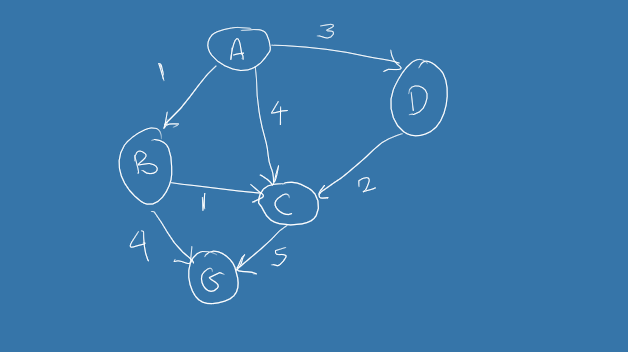

In [6]:
l = set((1,1,2))
print(l)

{1, 2}


In [26]:
graph = {'A':[('B',1),('C',4),('D',3)],
         'B':[('C',1) , ('G',4)],
         'C':[('G',5)],
         'D':[('C',2)] 
         ,'G':[]   }
graph

{'A': [('B', 1), ('C', 4), ('D', 3)],
 'B': [('C', 1), ('G', 4)],
 'C': [('G', 5)],
 'D': [('C', 2)],
 'G': []}

In [10]:
i,k = [1 , 2]
print(k)

2


In [18]:
l = [[1,3],[2,3],[4,5]]
for first ,second in l:
    print(second)

3
3
5


In [27]:
def path_cost_finder(path):#[(A,1) , (B,1)]
    total_cost = 0
    for node , cost in path:
        total_cost += cost

    return total_cost

In [25]:
queue = [[('A', 0), ('B', 1),('C' , 5)], [('A' , 0) , ('K' , 4)] , [('A' , 0) , ('F' , 3)]]
queue.sort(key = path_cost_finder)
print(queue)#

[[('A', 0), ('F', 3)], [('A', 0), ('K', 4)], [('A', 0), ('B', 1), ('C', 5)]]


In [28]:
def UCS(graph , start , goal):
    visited = []
    path = []
    queue = [[(start , 0)]]
    while queue:
        queue.sort(key = path_cost_finder)
        path = queue.pop(0)
        node = path[-1][0]
        if node == goal:
            return path
        if node in visited:
            continue
        else:
            visited.append(node)
            adjacent = graph[node]
            for next_node,cost in adjacent:
                new_path = path.copy()
                new_path.append((next_node , cost))
                queue.append(new_path)
    

In [29]:
UCS(graph , 'A' , 'C')

[('A', 0), ('B', 1), ('C', 1)]

### Depth Limited Search
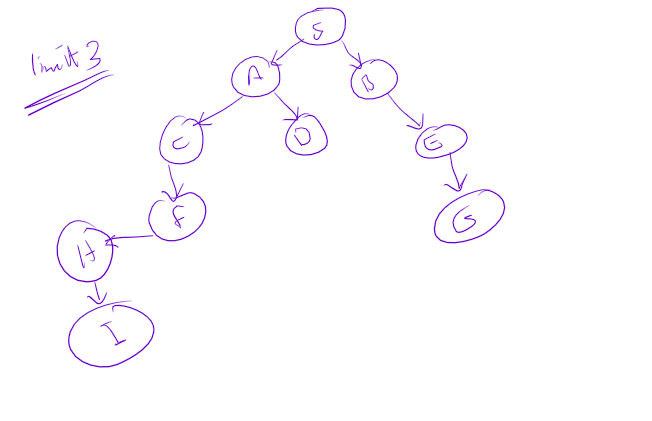

In [35]:
dls_graph = {'S':['A','B'],
              'A':['C','D'],
              'C': ['F'],
              'F' : ['H'],
              'H':['I'],
              'I': [],
              'D' : [],
              'B':['E'],
              'E': ['G'],
              'G': []}
dls_graph

{'S': ['A', 'B'],
 'A': ['C', 'D'],
 'C': ['F'],
 'F': ['H'],
 'H': ['I'],
 'I': [],
 'D': [],
 'B': ['E'],
 'E': ['G'],
 'G': []}

In [36]:
def bfs(graph , start , goal):
    visited = []
    stack = [[start]]
    while stack:
        path = stack.pop(0)
        node = path[-1]
        print(node)
        if node in visited:
            continue
        visited.append(node)
        if node == goal:
            return path
        else:
            for adj_node in graph[node][::-1]:
                temp_path = path.copy()#The copy() method returns a new list. It doesn't modify the original list.
                #print(temp_path)
                temp_path.append(adj_node)
                stack.append(temp_path)
bfs(dls_graph , 'S' , 'G')

S
B
A
E
D
C
G


['S', 'B', 'E', 'G']

In [42]:
def DLS_BF(graph , start , goal,limit):
    #Breadth first implementation
    visited = []
    stack = [[start]]
    while stack:
        
        path = stack.pop(-1)
        if len(path) > limit:
            
            #break 
            continue
        node = path[-1]
        if node in visited:
            continue
        
        visited.append(node)
        if node == goal:
            return path
        else:
            #print(node)
            for adj_node in graph[node]:
                temp_path = path.copy()#The copy() method returns a new list. It doesn't modify the original list.
                temp_path.append(adj_node)   
                stack.append(temp_path)
    return "Failure due to limit exceeding"
    #print(queue)

In [43]:
DLS_BF(dls_graph , 'S' , 'G',3)

'Failure due to limit exceeding'

In [44]:
def DLS_DF(graph , start , goal,limit):
    #Depth first implementation
    visited = []
    queue = [[start]]
    while queue:
        
        path = queue.pop(-1)
        if len(path) > limit:
            continue
        node = path[-1]
        if node in visited:
            continue
        
        visited.append(node)
        if node == goal:
            return path
        else:
            #print(node)
            for adj_node in graph[node]:
                temp_path = path.copy()#The copy() method returns a new list. It doesn't modify the original list.
                temp_path.append(adj_node)   
                queue.append(temp_path)
    return False

In [45]:
DLS_DF(dls_graph , 'S' , 'G',4)

['S', 'B', 'E', 'G']

### Iterative Deepening Search

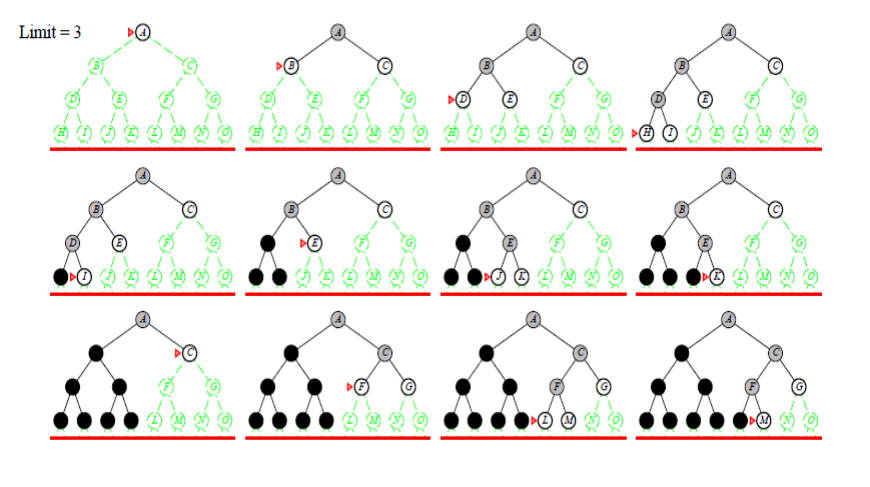
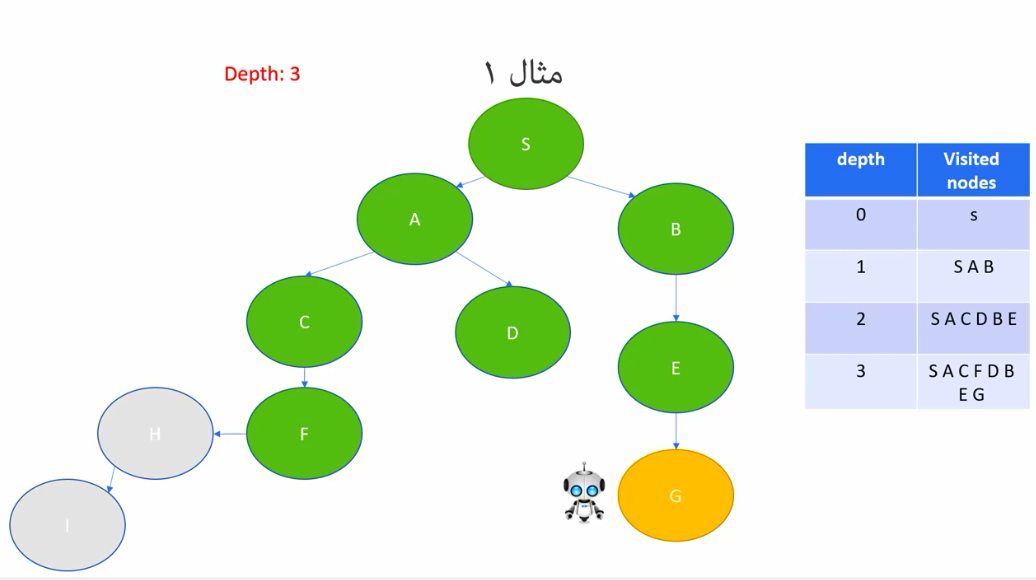

In [108]:
def IDS(graph , start , goal , limit):
    for depth in range(limit+1):
        result = DLS_DF(graph , start , goal,depth)
        print("depth = ",depth , "result = ",result)
        if not result:
            continue
        else:
            return result
    return False

In [110]:
IDS(dls_graph , 'S' , 'G',4)

depth =  0 result =  False
depth =  1 result =  False
depth =  2 result =  False
depth =  3 result =  ['S', 'B', 'E', 'G']


['S', 'B', 'E', 'G']

### Bidirectional Search

* The main idea behind bidirectional searches is to reduce the time taken for search drastically.

* This happens when both searches happen simultaneously from the initial node depth or breadth-first and backwards from goal nodes intersecting somewhere in between of the graph. 
* Now the path traverses through the initial node through the intersecting point to goal vertex is the shortest path found because of this search. 
* This is the shortest path and found in a fraction of time taken by other search algorithms.

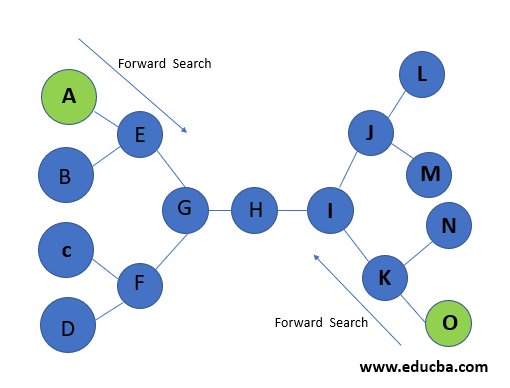

* #### Step 1: 
Say, A is the initial node and O is the goal node, and H is the intersection node.
* #### Step 2: 
We will start searching simultaneously from start to goal node and backward from goal to start node.

* #### Step 3: 
Whenever the forward search and backward search intersect at one node, then the searching stops.

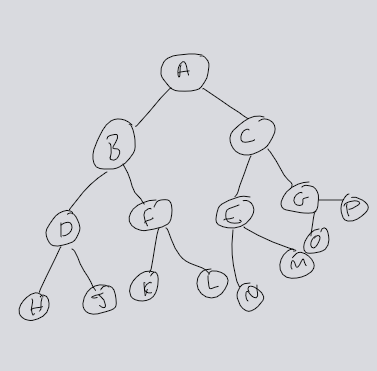

In [52]:
l = [1,2,4,6]
#    l[start:stop:step]
print(l[::-1])

[6, 4, 2, 1]


In [158]:
bi_graph2 = {'A' : [ 'B' , 'C' ],
            'B' : [ 'D' , 'F' , 'A' ],
            'C' : [ 'E' , 'G' , 'A' ],
            'D' : [ 'H' , 'J' , 'B' ],
            'F' : [ 'K' , 'L' , 'B' ],
            'E' : [ 'N' , 'M' , 'C' ],
            'G' : [ 'O' , 'P' , 'C' ],
            'H' : [ 'D' ],
            'J' : [ 'D' ],
            'K' : [ 'F' ],
            'L' : [ 'F' ],
            'N' : [ 'E' ],
            'M' : [ 'E' ],
            'P' : [ 'G' ],
            'O' : [ 'G' ]
            }
bi_graph2

{'A': ['B', 'C'],
 'B': ['D', 'F', 'A'],
 'C': ['E', 'G', 'A'],
 'D': ['H', 'J', 'B'],
 'F': ['K', 'L', 'B'],
 'E': ['N', 'M', 'C'],
 'G': ['O', 'P', 'C'],
 'H': ['D'],
 'J': ['D'],
 'K': ['F'],
 'L': ['F'],
 'N': ['E'],
 'M': ['E'],
 'P': ['G'],
 'O': ['G']}

In [156]:
bi_graph = {'S':['A','B'],
              'A':['C','D','S'],
              'C': ['F','A'],
              'F' : ['H','C'],
              'H':['I','F'],
              'I': ['H'],
              'D' : ['A'],
              'B':['S','E'],
              'E': ['G','B'],
              'G': ['E']}
bi_graph

{'S': ['A', 'B'],
 'A': ['C', 'D', 'S'],
 'C': ['F', 'A'],
 'F': ['H', 'C'],
 'H': ['I', 'F'],
 'I': ['H'],
 'D': ['A'],
 'B': ['S', 'E'],
 'E': ['G', 'B'],
 'G': ['E']}

In [169]:
class BiS_class():
    def __init__(self ,graph , start , goal ):
        self.graph = graph
        self.start = start
        self.goal = goal
        self.visited_dfs = []
        self.queue = [[goal]]
        self.visited_bfs = []
        self.stack = [[start]]

    def dfs_for_bi(self):
        path = self.queue.pop(-1)
        node = path[-1]
        if node in self.visited_dfs:
            return node,path
        self.visited_dfs.append(node)
        if node == self.start:
            return node,path
        else:
            for adj_node in self.graph[node]:
                temp_path = path.copy()#The copy() method returns a new list. It doesn't modify the original list.
                temp_path.append(adj_node)
                self.queue.append(temp_path)
        return node,path
    def bfs_for_bi(self):
        path = self.stack.pop(0)
        node = path[-1]
        
        if node in self.visited_bfs:
            return self.graph[node],path
        self.visited_bfs.append(node)
        if node == self.goal:
            return node,path
        else:
            for adj_node in self.graph[node][::-1]:
                temp_path = path.copy()#The copy() method returns a new list. It doesn't modify the original list.
                temp_path.append(adj_node)
                self.stack.append(temp_path)
        return self.graph[node],path 
    def BiS(self):
        while 1:
            node, df_path = self.dfs_for_bi()
            #print("from end")
            #print(node,df_path)
            fring, bf_path = self.bfs_for_bi()
            #print("from start")
            #print(fring,bf_path)
            if node in fring:
                path = bf_path + df_path[::-1]
                return path
            elif self.goal in bf_path:
                return bf_path
            elif self.start in df_path:
                return df_path[: : -1]

In [170]:
alg_bis = BiS_class(bi_graph, 'S', 'G')
alg_bis.BiS()

from end
G ['G']
from start
['A', 'B'] ['S']
from end
E ['G', 'E']
from start
['S', 'E'] ['S', 'B']


['S', 'B', 'E', 'G']

In [171]:
alg_bis = BiS_class(bi_graph2, 'A', 'L')
alg_bis.BiS()

from end
L ['L']
from start
['B', 'C'] ['A']
from end
F ['L', 'F']
from start
['E', 'G', 'A'] ['A', 'C']
from end
B ['L', 'F', 'B']
from start
['D', 'F', 'A'] ['A', 'B']
from end
A ['L', 'F', 'B', 'A']
from start
['B', 'C'] ['A', 'C', 'A']


['A', 'B', 'F', 'L']

In [114]:
def bi_directional_search(graph, start, goal):
    # Check if start and goal are equal.
    if start == goal:
        return [start]
    # Get dictionary of currently active vertices with their corresponding paths.
    active_vertices_path_dict = {start: [start], goal: [goal]}
    # Vertices we have already examined.
    inactive_vertices = set()

    while len(active_vertices_path_dict) > 0:
        # Make a copy of active vertices so we can modify the original dictionary as we go.
        active_vertices = list(active_vertices_path_dict.keys())

        for vertex in active_vertices:
            # Get the path to where we are.
            current_path = active_vertices_path_dict[vertex]
            # Record whether we started at start or goal.
            origin = current_path[0]
            # Check for new neighbours.
            current_neighbours = set(graph[vertex]) - inactive_vertices
            # Check if our neighbours hit an active vertex

            if len(current_neighbours.intersection(active_vertices)) > 0:
                for meeting_vertex in current_neighbours.intersection(active_vertices):
                    # Check the two paths didn't start at same place. If not, then we've got a path from start to goal.
                    if origin != active_vertices_path_dict[meeting_vertex][0]:
                        # Reverse one of the paths.
                        active_vertices_path_dict[meeting_vertex].reverse()
                        # return the combined results
                        return active_vertices_path_dict[vertex] + active_vertices_path_dict[meeting_vertex]

            # No hits, so check for new neighbours to extend our paths.
            if len(set(current_neighbours) - inactive_vertices - set(active_vertices))  == 0:
                # If none, then remove the current path and record the endpoint as inactive.
                active_vertices_path_dict.pop(vertex, None)
                inactive_vertices.add(vertex)

            else:
                # Otherwise extend the paths, remove the previous one and update the inactive vertices.
                for neighbour_vertex in current_neighbours - inactive_vertices - set(active_vertices):
                    active_vertices_path_dict[neighbour_vertex] = current_path + [neighbour_vertex]
                    active_vertices.append(neighbour_vertex)
                    
                active_vertices_path_dict.pop(vertex, None)
                inactive_vertices.add(vertex)
    return None

In [122]:
bfs(bi_graph, 'G', 'S')

G
E
B
G
E
S


['G', 'E', 'B', 'S']

In [123]:
bfs(bi_graph, 'S', 'G')

S
B
A
E
S
S
D
C
B
G


['S', 'B', 'E', 'G']